In [27]:
import numpy as np
import tensorflow as tf
import tflearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Read data
dataset = pd.read_csv("Data/data.csv")

In [20]:
# Length of data
len(dataset)

92000

In [21]:
# Plot dataset examples
X = dataset.iloc[:,:-1]
Y_d = dataset.iloc[:,-1]

num_pixels = X.shape[1]
num_classes = 46
img_width = 32
img_height = 32
img_depth = 1

X_images = X.values.reshape(X.shape[0], img_width, img_height)

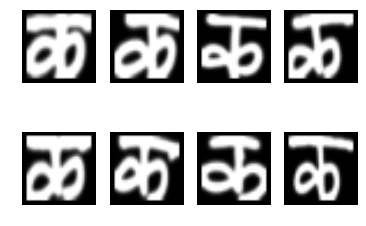

In [23]:
for i in range(1, 9):    
    plt.subplot(240+i)
    plt.axis('off')
    plt.imshow(X_images[i-1], cmap=plt.get_cmap('gray'))
plt.show()

In [24]:
dataset.iloc[:,1024].value_counts()

character_31_petchiryakha    2000
character_32_patalosaw       2000
character_14_dhaa            2000
character_13_daa             2000
character_36_gya             2000
character_19_dha             2000
character_16_tabala          2000
character_11_taamatar        2000
character_30_motosaw         2000
character_33_ha              2000
character_28_la              2000
character_10_yna             2000
character_35_tra             2000
character_22_pha             2000
character_04_gha             2000
character_02_kha             2000
character_06_cha             2000
character_12_thaa            2000
character_18_da              2000
character_23_ba              2000
character_01_ka              2000
character_29_waw             2000
character_05_kna             2000
character_17_tha             2000
character_08_ja              2000
character_25_ma              2000
character_07_chha            2000
character_03_ga              2000
character_20_na              2000
character_21_p

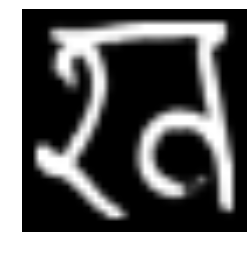

In [25]:
plt.imshow(X_images[2000], cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

In [28]:
# Output in binary format
from sklearn.preprocessing import LabelBinarizer
binencoder = LabelBinarizer()
Y = binencoder.fit_transform(Y_d)

# Data normalization
X = X / 255

seed = 123 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)

In [31]:
# DNN model
def build_model():
    tf.reset_default_graph()
    
    # Input Layer
    net = tflearn.input_data([None, 784])
    
    # Hidden layers
    net = tflearn.fully_connected(net, 300, activation='ReLU')
    net = tflearn.fully_connected(net, 100, activation='ReLU')
    
    # output layer
    net = tflearn.fully_connected(net, 10,  activation='softmax')
    net = tflearn.regression(net, optimizer='sgd', learning_rate=0.05, loss='categorical_crossentropy')
    
    # This model assumes that your network is named "net"    
    model = tflearn.DNN(net)
    return model

In [32]:
# Build model
model = build_model()

In [33]:
# Train
model.fit(trainX, trainY, validation_set=0.1, batch_size=200, show_metric=False, n_epoch=25)

Training Step: 5624  | total loss: 0.62959 | time: 3.361s
| SGD | epoch: 025 | loss: 0.62959 -- iter: 44800/45000
Training Step: 5625  | total loss: 0.57605 | time: 3.385s
| SGD | epoch: 025 | loss: 0.57605 | val_loss: 0.00000 -- iter: 45000/45000
--


In [34]:
# Calculate accuracy
predictions = np.array(model.predict(testX)).argmax(axis=1)
actual = testY.argmax(axis=1)
test_accuracy = np.mean(predictions == actual, axis=0)

# Print out the result
print("Test accuracy: ", test_accuracy)

('Test accuracy: ', 0.96889999999999998)


In [35]:
# Print the results to an external file (CSV)
import pandas as pd

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("results.csv", index=False, header=True)